In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('doctor consultation.csv')

In [3]:
df.shape

(5110, 12)

In [4]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'consult doctor'],
      dtype='object')

In [5]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,consult doctor
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
consult doctor         int64
dtype: object

/home/u190362/tmp/ipykernel_2007739/2317533667.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap="RdYlBu")


<AxesSubplot: >

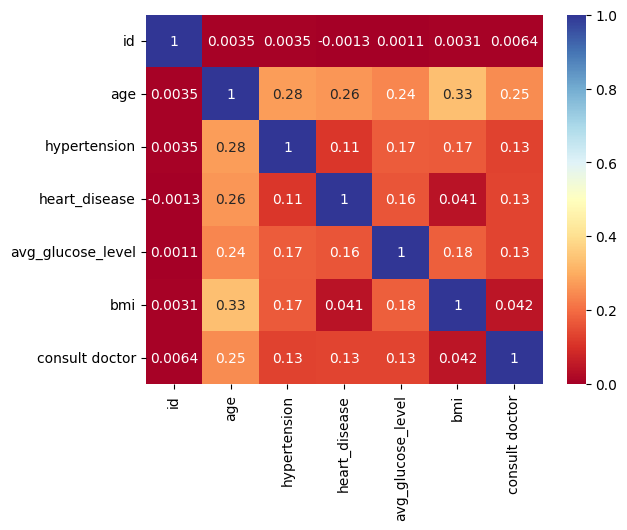

In [7]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap="RdYlBu")

In [8]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [9]:
gender=pd.get_dummies(df[['gender']],drop_first=True)
print(df.gender.value_counts())

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


In [10]:
smoking=pd.get_dummies(df[['smoking_status']],drop_first=True)
smoking.head()

,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,0,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0


In [11]:
df.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [12]:
residence=pd.get_dummies(df[['Residence_type']],drop_first=True)
residence.head()

,Residence_type_Urban
0,1
1,0
2,0
3,1
4,0


In [13]:
df.Residence_type.value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

/home/u190362/tmp/ipykernel_2007739/2196185854.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr()['consult doctor'].sort_values(ascending=False).to_frame()


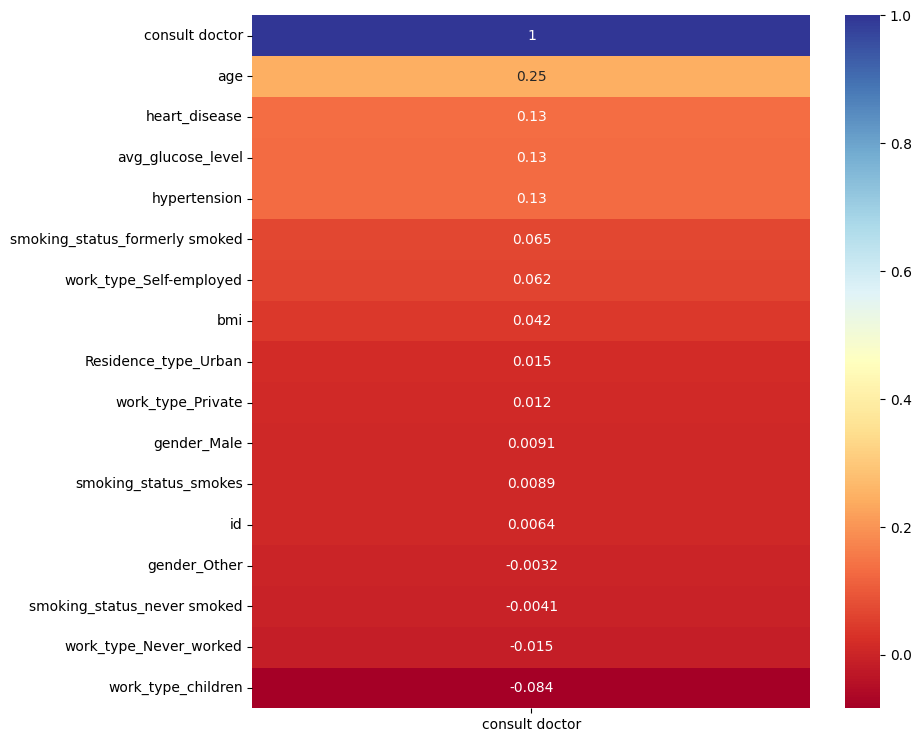

In [19]:
working=pd.get_dummies(df[['work_type']],drop_first=True)
working.head()
df.work_type.value_counts()
data=pd.concat([df,gender,working,residence,smoking],axis=1)
corr=data.corr()['consult doctor'].sort_values(ascending=False).to_frame()
plt.figure(figsize=(9,9))
sns.heatmap(corr,cmap='RdYlBu',annot=True)
plt.show()